# Aircraft Risk Analysis Project - Phase 1

## Introduction


In today's fast-evolving business landscape, diversification is key to staying competitive. This project explores a scenario where a company is looking to expand into the aviation industry—an exciting but high-risk move. While the aviation sector holds strong potential for both commercial and private enterprise, safety remains a top concern, especially for new entrants with limited industry experience.

The goal of this project is to use data science techniques to help the company make informed, data-driven decisions as it considers which aircraft to invest in. By examining historical accident data, we can uncover patterns, evaluate safety records, and highlight aircraft models that pose the least operational risk.

This project serves as both a business case and a demonstration of key data science skills: data cleaning, missing value imputation, exploratory data analysis, and visualization. The final output will include actionable insights and an interactive dashboard designed to support decision-making by the company’s new aviation division.



## Objectives

- Understand trends in aircraft accidents over time  
- Identify aircraft with the lowest risk profiles  
- Handle missing data and perform necessary cleaning  
- Present insights using clear visualizations  
- Build an interactive dashboard for stakeholders

## Data Source

The dataset comes from the National Transportation Safety Board (NTSB) and includes records of civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023.

## Tools & Libraries

- Python (Pandas, NumPy, Matplotlib)
- Jupyter Notebook
- Data cleaning and wrangling
- Exploratory data analysis (EDA)

### Step 1 : Import Libraries

In [9]:
#Importing libraries using standard alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2 : Load and Inspect Data

In [10]:
#Loading the csv file into the notebook
#Adding low_memory=False to allow pandas to read the full file before deciding datatypes
#Telling pandas to treat ? , Unknown , N/A and blank spaces as missing values
data= pd.read_csv('data/Aviation_Data.csv', low_memory=False, na_values=['?', 'Unknown', 'N/A', ''])

#Inspect the first 5 rows of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,NaN,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [11]:
# Checking the number of rows and columns in the dataset
data.shape

# Displaying the dataset's dimensions (rows, columns)
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset contains 90348 rows and 31 columns.


In [12]:
# Get a summary of the dataset:That is the  column names, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88836 non-null  object 
 5   Country                 88660 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52783 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85576 non-null  object 
 12  Aircraft.Category       32273 non-null  object 
 13  Registration.Number     87569 non-null  object 
 14  Make                    88805 non-null

In [13]:
#Look at all columns present
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [14]:
#summary statistics for numerical columns in the dataset
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Step 3 : Data Cleaning

In [15]:
# Create a copy of the cleaned DataFrame to avoid modifying the original
cleaned_data = data.copy()

In [17]:
#Change the Event.Date and Publication.Date columns into datetime
cleaned_data['Event.Date']=pd.to_datetime(cleaned_data['Event.Date'])
cleaned_data['Publication.Date']=pd.to_datetime(cleaned_data['Publication.Date'])

#Check if it has been applied
cleaned_data[['Event.Date','Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaT
1,1962-07-19,1996-09-19
2,1974-08-30,2007-02-26
3,1977-06-19,2000-12-09
4,1979-08-02,1980-04-16


In [18]:
# Check if there are any duplicate rows
cleaned_data.duplicated().any()


True

In [19]:
# Drop duplicated rows and keep the first occurrence
cleaned_data = cleaned_data.drop_duplicates()

#Check dimensions of our cleaned data after duplicates have been dropped
cleaned_data.shape
print(f"The Cleaned dataset contains {cleaned_data.shape[0]} rows and {cleaned_data.shape[1]} columns.")


The Cleaned dataset contains 88958 rows and 31 columns.


In [20]:
# Calculate the threshold: keep columns with at least half non-null values
threshold = cleaned_data.shape[0] // 2

# Drop columns with more than half missing values
cleaned_data = cleaned_data.dropna(axis=1, thresh=threshold)


In [21]:
#Check how many columns have remained
cleaned_data.info()
cleaned_data.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88958 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88836 non-null  object        
 5   Country                 88660 non-null  object        
 6   Airport.Code            50249 non-null  object        
 7   Airport.Name            52783 non-null  object        
 8   Injury.Severity         87889 non-null  object        
 9   Aircraft.damage         85576 non-null  object        
 10  Registration.Number     87569 non-null  object        
 11  Make                    88805 non-null  object        
 12  Model                   88796 non-null  object

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [22]:
#Group the numerical values and fill them with the mean
numeric_values = cleaned_data.select_dtypes(include=[float, int]).columns
cleaned_data[numeric_values] = cleaned_data[numeric_values].fillna(cleaned_data[numeric_values].mean())


In [23]:
#Check for any null values in the numerical values
cleaned_data[numeric_values].isna().sum()

Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [24]:
#Group the categorical values and fill them with the mode
categorical_values = cleaned_data.select_dtypes(include=['object']).columns

for column in categorical_values:
    if not cleaned_data[column].mode().empty:
        mode_value = cleaned_data[column].mode().iloc[0]
        cleaned_data[column].fillna(mode_value, inplace=True)



In [25]:
#Check for any null values in the categorical values
cleaned_data[categorical_values].isna().sum()

Event.Id                 0
Investigation.Type       0
Accident.Number          0
Location                 0
Country                  0
Airport.Code             0
Airport.Name             0
Injury.Severity          0
Aircraft.damage          0
Registration.Number      0
Make                     0
Model                    0
Amateur.Built            0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Broad.phase.of.flight    0
Report.Status            0
dtype: int64

In [26]:
# Select numeric and categorical data by column names, then combine them back into one DataFrame
numerical_data = cleaned_data[numeric_values]
categorical_data = cleaned_data[categorical_values]
cleaned_data = pd.concat([numerical_data, categorical_data], axis=1)

#Check the 1st 5 rows of the cleaned data
cleaned_data.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Id,Investigation.Type,Accident.Number,Location,Country,...,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Report.Status
0,1.000000,2.0,0.000000,0.000000,0.00000,20001218X45444,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,...,Destroyed,NC6404,Stinson,108-3,No,Reciprocating,Personal,UNK,Cruise,Probable Cause
1,1.000000,4.0,0.000000,0.000000,0.00000,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,...,Destroyed,N5069P,Piper,PA24-180,No,Reciprocating,Personal,UNK,Landing,Probable Cause
2,1.000000,3.0,0.279881,0.357061,5.32544,20061025X01555,Accident,NYC07LA005,"Saltville, VA",United States,...,Destroyed,N5142R,Cessna,172M,No,Reciprocating,Personal,IMC,Cruise,Probable Cause
3,1.000000,2.0,0.000000,0.000000,0.00000,20001218X45448,Accident,LAX96LA321,"EUREKA, CA",United States,...,Destroyed,N1168J,Rockwell,112,No,Reciprocating,Personal,IMC,Cruise,Probable Cause
4,1.146585,1.0,2.000000,0.357061,0.00000,20041105X01764,Accident,CHI79FA064,"Canton, OH",United States,...,Destroyed,N15NY,Cessna,501,No,Reciprocating,Personal,VMC,Approach,Probable Cause


In [28]:
#Check the columns
cleaned_data.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Id',
       'Investigation.Type', 'Accident.Number', 'Location', 'Country',
       'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type',
       'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
       'Report.Status'],
      dtype='object')

In [29]:
# Display the summary of the DataFrame to check data types, non-null counts, and memory usage
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number.of.Engines       88958 non-null  float64
 1   Total.Fatal.Injuries    88958 non-null  float64
 2   Total.Serious.Injuries  88958 non-null  float64
 3   Total.Minor.Injuries    88958 non-null  float64
 4   Total.Uninjured         88958 non-null  float64
 5   Event.Id                88958 non-null  object 
 6   Investigation.Type      88958 non-null  object 
 7   Accident.Number         88958 non-null  object 
 8   Location                88958 non-null  object 
 9   Country                 88958 non-null  object 
 10  Airport.Code            88958 non-null  object 
 11  Airport.Name            88958 non-null  object 
 12  Injury.Severity         88958 non-null  object 
 13  Aircraft.damage         88958 non-null  object 
 14  Registration.Number     88958 non-null

'''
The dataset has been thoroughly cleaned, with missing values handled. Duplicate rows have been removed, and columns with more than 50% of their values missing have been excluded. Following these data cleaning steps, the dataset now consists of 25 columns and 88,895 rows. The next step involves visualizing the cleaned data.
'''

### Step 4 : Data Analysis and Visualizations

In [ ]:
#summary statistics for numerical columns in the cleaned dataset
cleaned_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88958.000000,88958.000000,88958.000000,88958.000000,88958.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.430791,5.120083,1.430754,2.079349,26.958925
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


'''
Key Analysis:

Fatal Injuries: Majority of the accidents habe no fatalities as seen in the 25%, 50% and 75% percentiles. However, there are extreme cases with upto 349 fatal injuries in one incident

Serious and Minor Injuries: Similar to the fatal injuries, majority of the incidents have no serious and minor injuries, but there are some outliers with other 161 serious injuries and 380 minor injuries

Uninjured individuals: Most accidesnts have some injured individals with a higher median value of 2 while in other cases many people were uninjured
'''

#### Step 4a : Accident Frequency by Aircraft Make

In [35]:
#Check the columns we have
cleaned_data.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Id',
       'Investigation.Type', 'Accident.Number', 'Location', 'Country',
       'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type',
       'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
       'Report.Status'],
      dtype='object')

In [36]:
#Check if we can use the accident Number column
cleaned_data['Accident.Number'].head()

0    SEA87LA080
1    LAX94LA336
2    NYC07LA005
3    LAX96LA321
4    CHI79FA064
Name: Accident.Number, dtype: object

In [37]:
# Create a new column for Total Accidents (sum of Serious and Minor Injuries)
cleaned_data['Total.Accidents'] = cleaned_data['Total.Serious.Injuries'] + cleaned_data['Total.Minor.Injuries']

# Check if  the new column is added
cleaned_data[['Make', 'Model', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Accidents']].head()

,Make,Model,Total.Serious.Injuries,Total.Minor.Injuries,Total.Accidents
0,Stinson,108-3,0.000000,0.000000,0.000000
1,Piper,PA24-180,0.000000,0.000000,0.000000
2,Cessna,172M,0.279881,0.357061,0.636942
3,Rockwell,112,0.000000,0.000000,0.000000
4,Cessna,501,2.000000,0.357061,2.357061


In [38]:
# Count the number of accidents per aircraft make
accidents_per_model = cleaned_data.groupby('Make').size().reset_index(name='Total.Accidents')

# Sort by the accident count for better readability
accidents_per_model = accidents_per_model.sort_values(by='Total.Accidents', ascending=False)

# Display the top 10 aircraft types with the most accidents
accidents_per_model.head(10)


,Make,Total.Accidents
1567,Cessna,22380
5795,Piper,12029
1320,CESSNA,4922
936,Beech,4330
5608,PIPER,2841
948,Bell,2134
1066,Boeing,1594
701,BOEING,1151
3169,Grumman,1094
5217,Mooney,1092


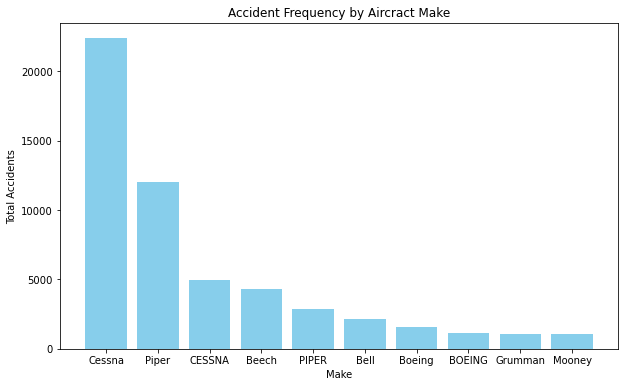

In [42]:
#Plot a bar Graph to show the relationship between make and Total accidents
plt.figure(figsize=(10,6))

#Limit the bar graph to only show the top 10 makes
top_makes = accidents_per_model.head(10)
bars = plt.bar(top_makes['Make'],top_makes['Total.Accidents'], color='skyblue')

plt.title('Accident Frequency by Aircract Make')

plt.xlabel('Make')
plt.ylabel('Total Accidents')
plt.show()

#### Step 4b : Accident Severity by Aircraft make 

In [52]:
#Filter fatal accidents
fatal_accidents = cleaned_data[cleaned_data['Injury.Severity'] == 'Fatal']
fatal_accidents

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Id,Investigation.Type,Accident.Number,Location,Country,...,Registration.Number,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Report.Status,Total.Accidents
63917,1.000000,0.0,0.0,0.0,8.0,20080107X00027,Accident,DFW08LA055,"Oklahoma City, OK",United States,...,N398J,Pilatus,PC-12/45,No,Turbo Prop,Personal,VMC,Landing,The line technician's failure to remain clear ...,0.0
63922,2.000000,6.0,1.0,3.0,0.0,20080116X00063,Accident,ANC08MA038,"Kodiak, AK",United States,...,N509FN,PIPER,PA-31-350,No,Reciprocating,Personal,VMC,Landing,The failure of company maintenance personnel t...,4.0
63931,1.146585,1.0,1.0,0.0,0.0,20080220X00219,Accident,DEN08WA048,"Zuzenhausen, Germany",Germany,...,D-HJET,Bell,206B,No,Reciprocating,Aerial Observation,IMC,Landing,Probable Cause,1.0
63936,1.000000,1.0,0.0,0.0,0.0,20080117X00068,Accident,SEA08LA058,"Perris, CA",United States,...,N9639H,Corsario,MK-5,Yes,Reciprocating,Personal,VMC,Landing,The pilot's failure to maintain clearance from...,0.0
63940,1.146585,6.0,0.0,0.0,0.0,20080118X00079,Accident,DCA08WA027,"Windhoek, Namibia",Namibia,...,V5-GWH,Cessna,210M,No,Reciprocating,Personal,VMC,Landing,Probable Cause,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90302,1.000000,2.0,0.0,0.0,0.0,20221205106408,Accident,CEN23FA057,"Cleburne, TX",United States,...,N8149Z,CESSNA,210-5(205),No,Reciprocating,Personal,IMC,Landing,Probable Cause,0.0
90304,1.000000,1.0,0.0,0.0,0.0,20221205106417,Accident,CEN23FA059,"Corning, IA",United States,...,N99345,ENGINEERING & RESEARCH,ERCOUPE 415-C,No,Reciprocating,Personal,VMC,Landing,Probable Cause,0.0
90305,1.000000,3.0,0.0,0.0,0.0,20221206106419,Accident,CEN23FA060,"Yukon, OK",United States,...,N9142Q,BEECH,F33A,No,Reciprocating,Personal,VMC,Landing,Probable Cause,0.0
90327,1.146585,1.0,0.0,0.0,0.0,20221213106451,Accident,ERA23FA087,"Kellyton, AL",United States,...,N74586,MOONEY,M20B,No,Reciprocating,Executive/corporate,VMC,Landing,Probable Cause,0.0


In [54]:
#Group by aircraft make and count
fatal_by_make = fatal_accidents.groupby('Make').size().reset_index(name='Fatal_Accident_Count')
fatal_by_make = fatal_by_make.sort_values('Fatal_Accident_Count', ascending=False)
print(fatal_by_make.head(10))

                   Make  Fatal_Accident_Count
266              CESSNA                   960
892               PIPER                   639
155               BEECH                   330
162                BELL                   168
331              Cessna                   160
971            ROBINSON                   157
916               Piper                   106
789              MOONEY                    75
282  CIRRUS DESIGN CORP                    68
229               Beech                    54
